<a href="https://colab.research.google.com/github/Nzaya/Online-Shoppers/blob/master/Online_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTION

Kira Plastinina  is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to **learn the characteristics of customer groups.**

Perform clustering and dimensionality reduction stating insights drawn from your analysis and visualizations.

Upon implementation, provide comparisons between the approaches learned this week i.e. K-Means clustering vs Hierarchical clustering, PCA vs t SNE highlighting the strengths and limitations of each approach in the context of your analysis.

# INSTALLING R PACKAGES

In [0]:
#Installing packages

install.packages('data.table')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
install.packages('DataExplorer')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘igraph’, ‘gridExtra’, ‘networkD3’



In [0]:
install.packages('magrittr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
install.packages('readr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


# LOADING THE DATASET

In [0]:
#Loading the dataset

library('data.table')
online= fread('http://bit.ly/EcommerceCustomersDataset')
head(online)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


# FEATURE ENGINEERING


In [0]:
#Checking the size of our dataset

dim(online)

[1] 12330    18

In [0]:
#Description of our dataset
library(dplyr)
glimpse(online)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Observations: 12,330
Variables: 18
$ Administrative          <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ Informational           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ ProductRelated          <int> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, …
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.0500…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.1400…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, …
$ Month                   <chr> "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "Fe…
$ OperatingSystems        <int> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, …
$ Browser        

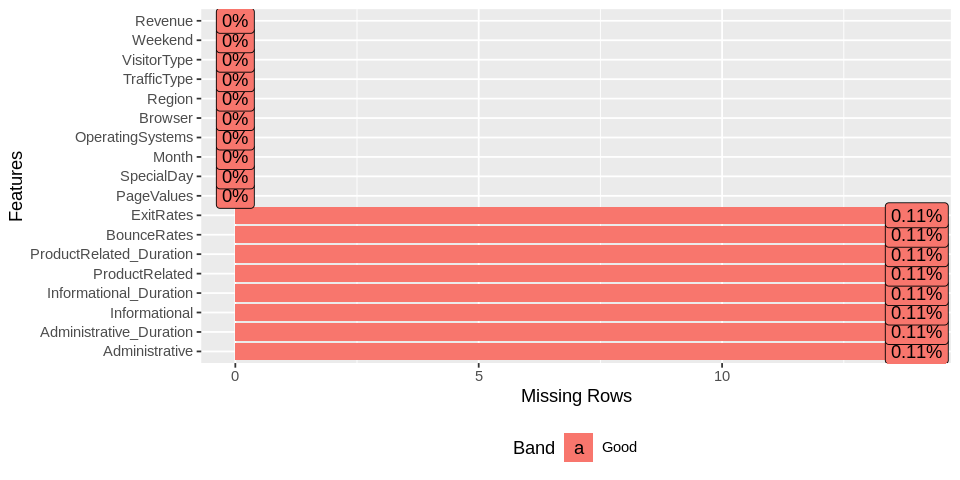

In [0]:
#Checking for missing values using the DataExplorer Package

options(repr.plot.width=8, repr.plot.height= 4)
plot_missing(online)


In [0]:
#Omitting the missing values to have a workable dataset

online= na.omit(online)

#Size of the dataset
dim(online)

[1] 12316    18

In [0]:
# Checking if the data types are correct for each variable.
str(online)

Classes ‘data.table’ and 'data.frame':	12316 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : chr  "Returning_Visitor" "Retu

In [0]:
# Factor variables changed to their appropriate data type.

online$OperatingSystems=as.factor(online$OperatingSystems)
online$Browser=as.factor(online$Browser)
online$Region=as.factor(online$Region)
online$Weekend=as.factor(online$Weekend)
online$Revenue=as.factor(online$Revenue)
online$SpecialDay=as.factor(online$SpecialDay)

In [0]:
# Confirming the transformation

str(online)

Classes ‘data.table’ and 'data.frame':	12316 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : Factor w/ 6 levels "0","0.2","0.4",..: 1 1 1 1 1 1 3 1 5 3 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : Factor w/ 8 levels "1","2","3","4",..: 1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : Factor w/ 13 levels "1","2","3","4",..: 1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : Factor w/ 9 levels "1","2","3","4",..: 1 1 9 2 

In [0]:
#Graph of the month and the Informational Duration

options(repr.plot.width=8, repr.plot.height=3)
online %>%
group_by('Month')%>%
summarize(visits= sum(lineTotal)) %>%
ggplot(aes(x= Month, y= Informational_Duration)) + geom_line() + geom_smooth(method= 'auto', se= FALSE)
+ labs(x= 'Month', y='Informational_Duration', title)
